## LSTM

- Solving `vanishing gradient` problem 


In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use("dark_background")

plt.rcParams.update({
    "axes.grid" : True
})



In [2]:
train_df = pd.read_csv("./Google_Stock_Price_Train.csv")
test_df = pd.read_csv("./Google_Stock_Price_Test.csv")

In [3]:
train_df["Date"] = train_df["Date"].apply(pd.to_datetime)
test_df["Date"] = test_df["Date"].apply(pd.to_datetime)

In [4]:
train_df.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
test_df.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
1,2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2,2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
3,2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
4,2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


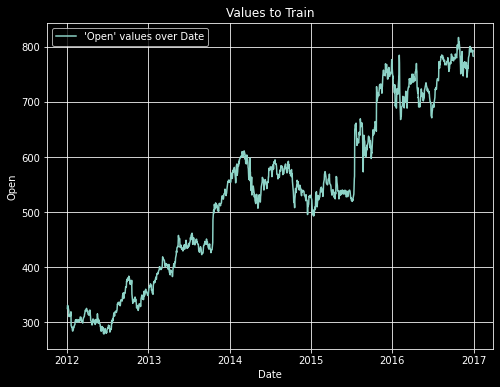

In [6]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set(
    title = "Values to Train",
    xlabel = "Date",
    ylabel = "Open"
)
ax.plot(train_df["Date"],train_df["Open"],label ="'Open' values over Date")
ax.legend(loc="best")
fig.show()

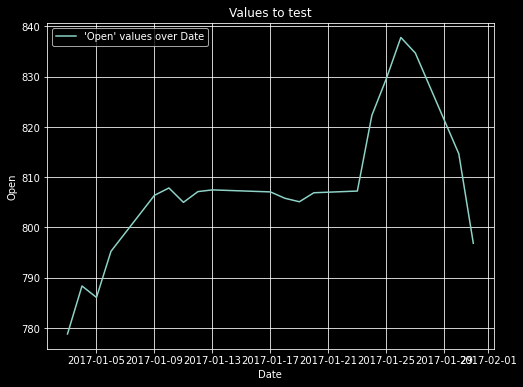

In [7]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set(
    title = "Values to test",
    xlabel = "Date",
    ylabel = "Open",
)
ax.plot(test_df["Date"],test_df["Open"],label ="'Open' values over Date")
ax.legend(loc="best")
fig.show()

In [8]:
training_set = train_df["Open"].values.reshape(-1,1)

In [9]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

- whenver there is RNN , it is recommended to apply normalization to the data

In [10]:
from sklearn.preprocessing import MinMaxScaler


In [11]:
normalizer = MinMaxScaler(feature_range=(0,1))
training_set_scaled = normalizer.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

- creating a training seq of window 60(60 days) and for forcast training it will take next day's value. Lets see how it goes

In [12]:
x_train = []
y_train = []


In [13]:
window = 60
total_length = len(training_set_scaled)
for i in range(window,total_length):
    x_train.append(training_set_scaled[i-window:i,0])
    y_train.append(training_set_scaled[i,0])


In [14]:
x_train, y_train = np.array(x_train),np.array(y_train)

In [15]:
x_train.shape

(1198, 60)

- Here it is a 2D matrix making sense of only one set of features
- Our goal is to convert it into a 3D matrix where if we have other features as well ,can be added.

In [16]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [17]:
x_train.shape

(1198, 60, 1)

In [18]:
y_train.shape

(1198,)

## building model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

- initialize model

In [20]:
regressor = Sequential()

- adding first LSTM layer and Dropout Regularization

In [23]:
regressor.add(
    LSTM(
        units = 50,
        return_sequences = True,
        input_shape = (x_train.shape[1],1)
    )
)

In [24]:
regressor.add(
    Dropout(
        rate = 0.2
    )
)

- adding second LSTM layer and Dropout Regularization

In [25]:
regressor.add(
    LSTM(
        units = 50,
        return_sequences = True
    )
)
regressor.add(
    Dropout(
        rate = 0.2
    )
)

- adding third LSTM layer and Dropout Regularization

In [26]:
regressor.add(
    LSTM(
        units = 50,
        return_sequences = True
    )
)
regressor.add(
    Dropout(
        rate = 0.2
    )
)

- adding fourth LSTM layer and Dropout Regularization (dont return Sequence)

In [27]:
regressor.add(
    LSTM(
        units = 50,
        return_sequences = False
    )
)
regressor.add(
    Dropout(
        rate = 0.2
    )
)

- add output layer

In [28]:
regressor.add(
    Dense(
        units = 1
    )
)

- Compile model

In [29]:
regressor.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
)

In [64]:
regressor.fit(x_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
38/38 [==============================] - 8s 222ms/step - loss: 0.0014
Epoch 2/200
38/38 [==============================] - 8s 214ms/step - loss: 0.0014
Epoch 3/200
38/38 [==============================] - 9s 228ms/step - loss: 0.0013
Epoch 4/200
38/38 [==============================] - 11s 290ms/step - loss: 0.0013
Epoch 5/200
38/38 [==============================] - 15s 397ms/step - loss: 0.0014
Epoch 6/200
38/38 [==============================] - 11s 291ms/step - loss: 0.0013
Epoch 7/200
38/38 [==============================] - 12s 309ms/step - loss: 0.0014
Epoch 8/200
38/38 [==============================] - 11s 277ms/step - loss: 0.0013
Epoch 9/200
38/38 [==============================] - 8s 211ms/step - loss: 0.0013
Epoch 10/200
38/38 [==============================] - 8s 212ms/step - loss: 0.0013
Epoch 11/200
38/38 [==============================] - 8s 220ms/step - loss: 0.0012
Epoch 12/200
38/38 [==============================] - 8s 215ms/step - loss: 0.0015
Epoch 13

- prepare testing set

In [32]:
testing_set = test_df["Open"].values.reshape(-1,1)
testing_set

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

- Now to get predictions for a month (20 working days) similar size to the testing set , we need previous 60 days values as input features to get 61th prediction(60+1).
- so joining both train df and test df to create a full dataset

In [57]:
total_dataset = pd.concat([train_df["Open"],test_df["Open"]],axis=0)

In [62]:

inputs_to_model = total_dataset[len(training_set) - len(testing_set) - window:].values
inputs_to_model = inputs_to_model.reshape(-1,1)
inputs_to_model = normalizer.transform(inputs_to_model)


x_test = []
upper_limit = window + len(testing_set)
for i in range(window,upper_limit):
    x_test.append(inputs_to_model[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))




In [65]:

predicted_values = regressor.predict(x_test)
predicted_values = normalizer.inverse_transform(predicted_values)


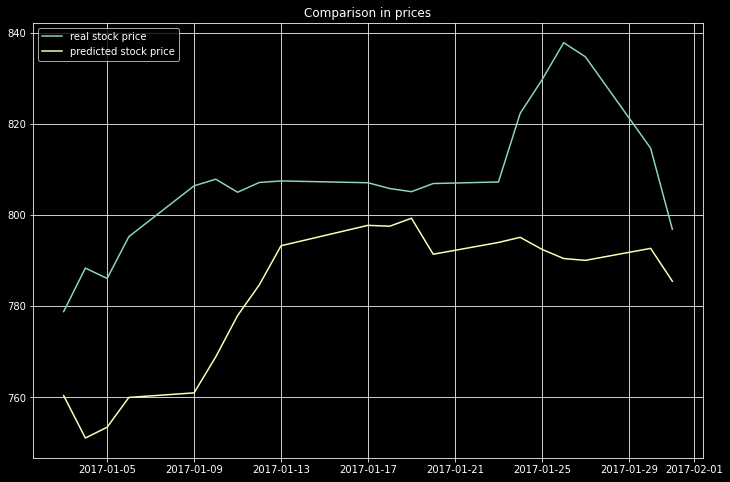

In [66]:
fig = plt.figure(figsize=(12,8))
plt.plot(test_df["Date"],testing_set,label="real stock price")
plt.plot(test_df["Date"],predicted_values,label="predicted stock price")
plt.legend(loc="best")
plt.title("Comparison in prices")
plt.show()